In [1]:
import numpy as np
import time
import sys

from matplotlib import pyplot as plt

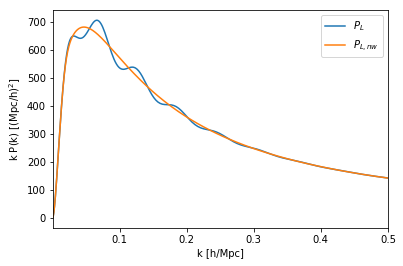

In [2]:
# Run the basic EPT class:
from EPT.moment_expansion_fftw import MomentExpansion

# we scale the z = 0 power spectrum given to give z = 0.8 results
z, D, f = 0.8, 0.6819, 0.8076
k, p = np.loadtxt('pk.dat').T
knw, pnw = np.loadtxt('pnw.dat').T

plt.plot(k, k*p, label=r'$P_L$')
plt.plot(k, k*pnw, label=r'$P_{L,nw}$')
plt.legend()
plt.xlim(1e-3, 0.5)
plt.xlabel('k [h/Mpc]')
plt.ylabel(r'k P(k) [(Mpc/h)$^2$]')
plt.show()


In [3]:
# Experiment with savitsky golay
#from scipy.signal import savgol_filter

In [4]:
#dlnk = (2 + 6)/3999.
#print(dlnk,np.log10(mome.ept.kint[-1]/mome.ept.kint[-2]))
#np.log10(7)/dlnk

In [5]:
#plt.loglog(mome.ept.kint, mome.ept.pint)
#plt.semilogx(k, p / (1e5*k/(1 + (k/0.01)**3)  ) )
#plt.show()

In [6]:
start = time.time()
#mome = MomentExpansion(k, D**2*p, pnw=D**2*pnw, beyond_gauss=True, one_loop= True, third_order = True,\
#                      N = 4000, extrap_min=-6, extrap_max=2, cutoff = 100, threads=1)
mome = MomentExpansion(k, D**2*p, pnw=None, beyond_gauss=True, one_loop= True, third_order = True,\
                      N = 2000, extrap_min=-6, extrap_max=2, cutoff = 100, threads=1)
end = time.time()
print(end-start)

213.0
In function -  update_power_spectrum
In function -  __init__
In function -  <module>
1.5696871280670166


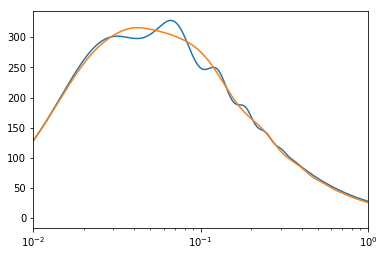

In [26]:
plt.semilogx(mome.ept.kint, mome.ept.kint * mome.ept.pint)
plt.semilogx(mome.ept.kint, mome.ept.kint * mome.ept_nw.pint)
plt.xlim(1e-2,1)
plt.show()

In [7]:
# We can use this to compute the various velocity moments in EPT

In [8]:
# Default parameters for the halo plots in Chen, Vlah and White (2020)
sn, sv, s0 = 1380, 3800,  7122
b1, b2, bs, b3 = 1.68593608, -1.17, -0.715, -0.479
alpha, alphav, alpha0, alpha2 = 16.9, -10.8, 21.0, 5.40

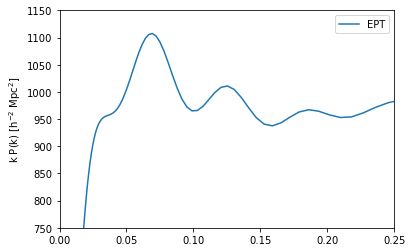

In [9]:
pth = mome.combine_bias_terms_pk(b1,b2,bs,b3,alpha,sn) #pept_func(kdat, sn, b1, b2, bs, b3, alpha )
plt.plot( mome.kv, mome.kv * pth,label=r'EPT' )

#plt.plot(ept.ept.kint, ept.ept.kint* (b1**2 * ept.ept.pint + sn) )
plt.legend()

plt.xlim(0,0.25)
plt.ylim(750,1150)

plt.ylabel(r'k P(k) [h$^{-2}$ Mpc$^2$]')
plt.show()

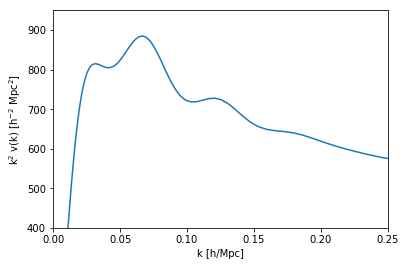

In [10]:
vth = mome.combine_bias_terms_vk(b1,b2,bs,b3,alphav,sv)
plt.plot(mome.kv, -f * mome.kv**2 * vth)


plt.ylabel(r'k$^2$ v(k) [h$^{-2}$ Mpc$^2$]')
plt.xlim(0,0.25)
plt.ylim(400,950)
plt.xlabel('k [h/Mpc]')
plt.show()

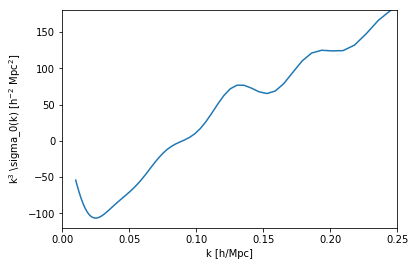

In [11]:
s0th, s2th = mome.combine_bias_terms_sk(b1,b2,bs,b3,alpha0,alpha2,s0)
plt.plot(mome.kv, f**2 * mome.kv**3 * s0th)

plt.ylabel(r'k$^3$ \sigma_0(k) [h$^{-2}$ Mpc$^2$]')
plt.xlim(0,0.25)
plt.ylim(-120,180)
plt.xlabel('k [h/Mpc]')
plt.show()

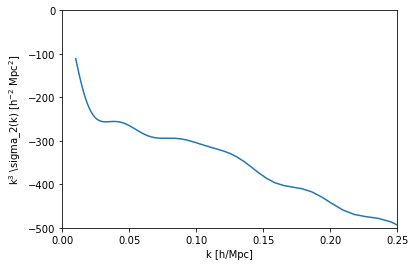

In [12]:
plt.plot(mome.kv, f**2 * mome.kv**3 * s2th)

plt.ylabel(r'k$^3$ \sigma_2(k) [h$^{-2}$ Mpc$^2$]')
plt.xlim(0,0.25)
plt.ylim(-500,0)
plt.xlabel('k [h/Mpc]')
plt.show()

In [13]:
# and combine them into the power spectrum:

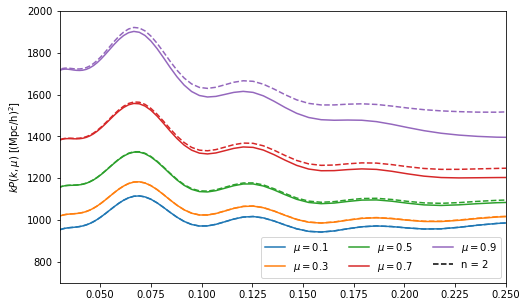

In [14]:
# Now combine into wedges via the moment expansion
plt.figure(figsize=(8,5))

mus = [0.1, 0.3, 0.5, 0.7, 0.9]

for ii, mu in enumerate(mus):
    
    # The c3 parameter is the counterterm ansatz to the third moment
    # Note that c3 enters as c3 / 6 * k^2 mu^4 P(k)
    
    pars = [b1,b2,bs,b3,alpha,alphav,alpha0,alpha2,sn,sv,s0]
    
    kw, pw = mome.compute_redshift_space_power_at_mu(pars,f,mu, counterterm_c3 = -6*10/D**2, beyond_gauss=False,reduced=False)
    plt.plot(kw, kw*pw,'C'+str(ii)+'-',label=r'$\mu = %.1f$'%(mu))
    
    kkw, pw = mome.compute_redshift_space_power_at_mu(pars,f,mu, counterterm_c3 = 0, beyond_gauss=False,reduced=False)
    plt.plot(kw, kw*pw,'C'+str(ii)+'--')

plt.plot(kw, -1000*kw, 'k--', label='n = 2')    
    
plt.ylabel(r'$k P(k,\mu)$ [(Mpc/h)$^2$]')


plt.xlim(0,0.25)
plt.ylim(500,2000)

plt.legend(ncol=3,loc='lower right')

plt.xlim(0.03,0.25)
plt.ylim(700,2000)



plt.show()

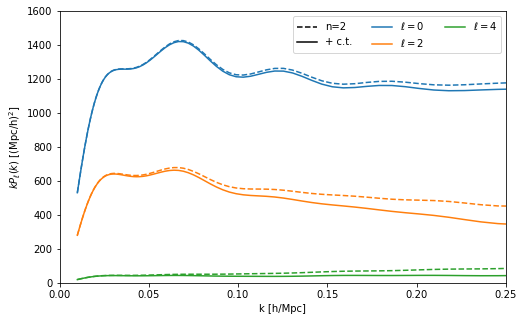

In [15]:
# ... and multipoles
plt.figure(figsize=(8,5))

ks, p0g, p2g, p4g = mome.compute_redshift_space_power_multipoles(pars,f,counterterm_c3=0)
ks, p0, p2, p4 = mome.compute_redshift_space_power_multipoles(pars,f,counterterm_c3=-6*10/D**2)

plt.plot(ks, -1000*ks,'k--',label='n=2')
plt.plot(ks, -1000*ks,'k-',label='+ c.t.')


plt.plot(ks, ks*p0,'C0-',label=r'$\ell = 0$')
plt.plot(ks, ks*p0g,'C0--')

plt.plot(ks, ks*p2,'C1-',label=r'$\ell = 2$')
plt.plot(ks, ks*p2g,'C1--')

plt.plot(ks, ks*p4,'C2-',label=r'$\ell = 4$')
plt.plot(ks, ks*p4g,'C2--')

plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$k P_\ell(k)$ [(Mpc/h)$^2$]')

plt.xlim(0,0.25)
plt.ylim(0,1600)

plt.legend(ncol=3,loc='upper right')

plt.show()

In [16]:
# Can also use compute the 1-loop P(k,mu) directly:
from EPT.ept_fullresum_fftw import REPT

In [17]:
start = time.time()
#ept = REPT(k, D**2*p, pnw=D**2*pnw, beyond_gauss=True, one_loop= True, third_order = True,\
#                      N = 2000, extrap_min=-6, extrap_max=2, cutoff = 100, threads=1)
ept = REPT(k, D**2*p, pnw=None, beyond_gauss=True, one_loop= True, third_order = True,\
                     N = 2000, extrap_min=-6, extrap_max=2, cutoff = 100, threads=1)

end = time.time()
print(end-start)

213.0
In function -  update_power_spectrum
In function -  __init__
In function -  <module>
0.8903512954711914


In [18]:
# Compare with moment expansion:
b1, b2, bs, b3 = 1.68593608, -1.17, -0.715, -0.479
sn, sn2, sn4 = 0, 0, 0
alpha0, alpha2, alpha4, alpha6 = 0,0,0,0
pars = [b1, b2, bs, b3, alpha0, alpha2, alpha4, alpha6, sn, sn2, sn4]

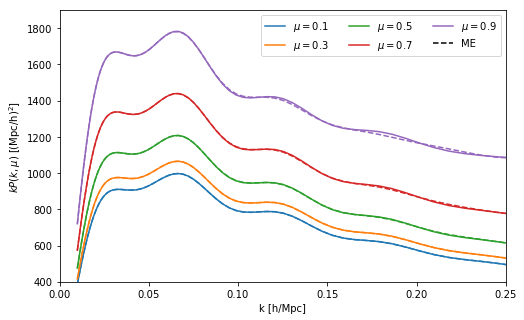

In [19]:
plt.figure(figsize=(8,5))

mus = [0.1, 0.3, 0.5, 0.7, 0.9]


for ii, mu in enumerate(mus):
    
    kw, pw = ept.compute_redshift_space_power_at_mu(pars,f,mu)
    plt.plot(kw, kw*pw,'C'+str(ii)+'-',label=r'$\mu = %.1f$'%(mu))
    
    kw, pw = mome.compute_redshift_space_power_at_mu(pars,f,mu,beyond_gauss=True)
    plt.plot(kw, kw*pw,'C'+str(ii)+'--')



plt.plot(kw, -1000*kw, 'k--',label='ME')
plt.ylabel(r'$k P(k,\mu)$ [(Mpc/h)$^2$]')
plt.xlabel(r'k [h/Mpc]')


plt.xlim(0,0.25)
plt.ylim(400,1900)

plt.legend(ncol=3,loc='upper right')



plt.show()

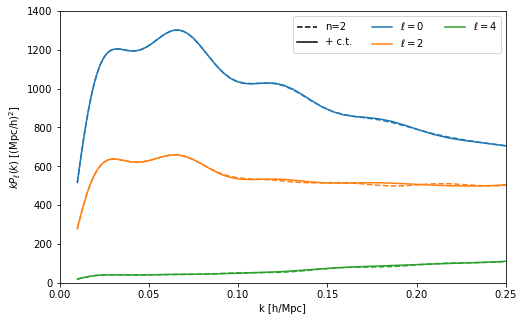

In [22]:
# ... and multipoles
plt.figure(figsize=(8,5))

ks, p0g, p2g, p4g = mome.compute_redshift_space_power_multipoles(pars,f,beyond_gauss=True,reduced=True)
ks, p0, p2, p4 = ept.compute_redshift_space_power_multipoles(pars,f)

plt.plot(ks, -1000*ks,'k--',label='n=2')
plt.plot(ks, -1000*ks,'k-',label='+ c.t.')


plt.plot(ks, ks*p0,'C0-',label=r'$\ell = 0$')
plt.plot(ks, ks*p0g,'C0--')

plt.plot(ks, ks*p2,'C1-',label=r'$\ell = 2$')
plt.plot(ks, ks*p2g,'C1--')

plt.plot(ks, ks*p4,'C2-',label=r'$\ell = 4$')
plt.plot(ks, ks*p4g,'C2--')

plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$k P_\ell(k)$ [(Mpc/h)$^2$]')

plt.xlim(0,0.25)
plt.ylim(0,1400)

plt.legend(ncol=3,loc='upper right')

plt.show()